In [1]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [4]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [9]:
#classificaiton iris with svm
from sklearn import svm
clf= svm.SVC(gamma = 0.001, C=100.)
svc = svm.SVC(kernel='linear')
svc = svm.SVC(kernel='poly',degree=3)
svc = svm.SVC(kernel='rbf')
#The term kernel is a term in statistical analysis used to refer to a window function . 
#The term "kernel" has several distinct meanings in different branches of statistics.

In [12]:
clf.fit(digits.data[:-1],digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
clf.predict(digits.data[-1:])

array([8])

In [14]:
x,y = iris.data, iris.target

In [15]:
clf.fit(x,y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
x.shape

(150, 4)

In [17]:
digits.images.shape

(1797, 8, 8)

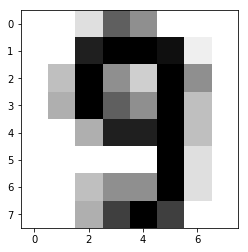

In [22]:
import matplotlib.pyplot as plt 
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r)
plt.show()

In [23]:
data = digits.images.reshape((digits.images.shape[0],-1))

In [24]:
data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [26]:
import numpy as np
np.unique(y)

array([0, 1, 2])

In [28]:
np.random.seed(0)
indices = np.random.permutation(len(x))
x_train = x[indices[:-10]]
y_train = y[indices[:-10]]
x_test = x[indices[-10:]]
y_test = y[indices[-10:]]

In [29]:
#knn classifier for iris 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
knn.predict(x_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [31]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [41]:
diabetes = datasets.load_diabetes()
X = np.c_[ .5, 1 = diabetes.data[:-20]
dia_y_train = diabetes.target[:-20]
dia_x_test = diabetes.data[-20:]
dia_y_test = diabetes.target[-20:]

In [42]:
#linear regression for predicting diabease 
from sklearn import linear_model 
reg = linear_model.LinearRegression()
reg.fit(dia_x_train, dia_y_train)
print(reg.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


In [43]:
np.mean((reg.predict(dia_x_test)-dia_y_test)**2)

2004.5676026898223

In [46]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

In [49]:
%matplotlib inline
plt.figure()


In [56]:
#choose best alpha for Lasso regression 
alphas = np.logspace(-4, -1, 6)
reg = linear_model.Lasso()
scores = [reg.set_params(alpha=alpha).fit(dia_x_train,dia_y_train).score(dia_x_test,dia_y_test)
         for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
reg.alpha = best_alpha
reg.fit(dia_x_train, dia_y_train)

Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
print(reg.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982    -0.
 -187.19554705   69.38229038  508.66011217   71.84239008]


In [58]:
reg.predict(dia_x_test)

array([ 201.12401963,  150.05917612,  169.41668981,  108.27663228,
        162.9832772 ,  132.57892492,  259.59588185,  102.25885014,
        114.9273041 ,  122.04914401,  217.89555432,   61.87142323,
        135.41462975,  121.01209971,   54.95254986,  193.38830893,
        106.32565561,  126.36363633,  208.19144275,   48.24571027])

In [61]:
reg.score(dia_x_test,dia_y_test)

0.58876224183092607

In [62]:
np.mean((reg.predict(dia_x_test)-dia_y_test)**2)

1986.7554077561035

In [63]:
#logistic classifer 
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(x_train,y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [67]:
logistic.predict_log_proba(x_test)

array([[ -1.17556801e+01,  -4.56321468e-05,  -1.01835596e+01],
       [ -1.87391370e+01,  -1.91618829e+00,  -1.59191365e-01],
       [ -1.74226517e+01,  -2.35511982e-04,  -8.35398173e+00],
       [ -7.16733630e-02,  -2.67125875e+00,  -5.57320900e+01],
       [ -3.26719550e-02,  -3.43752972e+00,  -4.99574541e+01],
       [ -2.71718481e-01,  -1.43577359e+00,  -5.22034482e+01],
       [ -2.63453121e+01,  -1.10921307e+00,  -4.00206565e-01],
       [ -1.25713922e+01,  -3.65554388e-06,  -1.54993336e+01],
       [ -2.95946337e+01,  -2.65394065e+00,  -7.29722244e-02],
       [ -1.73573872e-01,  -1.83668392e+00,  -5.06576024e+01]])

In [69]:
logistic.predict_proba(x_test)

array([[  7.84463965e-06,   9.99954369e-01,   3.77864660e-05],
       [  7.27270914e-09,   1.47166852e-01,   8.52833141e-01],
       [  2.71292962e-08,   9.99764516e-01,   2.35457122e-04],
       [  9.30834891e-01,   6.91651087e-02,   6.24972423e-25],
       [  9.67856008e-01,   3.21439921e-02,   2.01258094e-22],
       [  7.62068768e-01,   2.37931232e-01,   2.12975920e-23],
       [  3.61723170e-12,   3.29818404e-01,   6.70181596e-01],
       [  3.46987439e-06,   9.99996344e-01,   1.85662815e-07],
       [  1.40350469e-13,   7.03733494e-02,   9.29626651e-01],
       [  8.40655048e-01,   1.59344952e-01,   9.99269951e-23]])

In [70]:
logistic.score(x_test,y_test)

0.90000000000000002

## Choose estimators 

In [77]:
from sklearn.model_selection import KFold, cross_val_score
svc = svm.SVC(C=1, kernel='linear')
X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test: %s' %(train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [78]:
X_digits = digits.data
y_digits= digits.target
[svc.fit(X_digits[train],y_digits[train]).score(X_digits[test],y_digits[test])
        for train, test in k_fold.split(X_digits)]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [79]:
cross_val_score(svc, X_digits,y_digits,cv=k_fold,n_jobs=-1)

array([ 0.93489149,  0.95659432,  0.93989983])

In [80]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold,scoring='precision_macro')

array([ 0.93969761,  0.95911415,  0.94041254])

(0, 1.1)

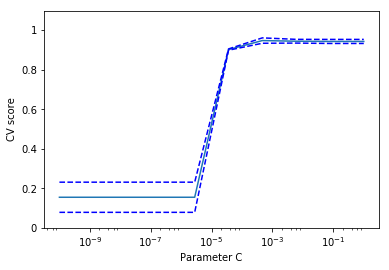

In [4]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc=svm.SVC(kernel= 'linear')
C_s = np.logspace(-10,0,10)

Scores = list()
Score_std = list()
for c in C_s:
    svc.C= c
    score = cross_val_score(svc,X,y,n_jobs=1)
    Scores.append(np.mean(score))
    Score_std.append(np.std(score))

%matplotlib inline
import matplotlib.pyplot as plt 
plt.figure(1,figsize=(6,4))
plt.clf()
plt.semilogx(C_s, Scores)
plt.semilogx(C_s, np.array(Scores) + np.array(Score_std), 'b--')
plt.semilogx(C_s, np.array(Scores) - np.array(Score_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)


In [15]:
#grid-search , computes the score during the fit of an estimator on a parameter grid 
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6,-1,10)
clf = GridSearchCV(estimator = svc, param_grid = dict(C=Cs), n_jobs=-1) 
clf.fit(X[:1000],y[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [16]:
clf.best_score_

0.92500000000000004

In [17]:
clf.best_estimator_.C

0.0077426368268112772

In [18]:
clf.score(X[1000:],y[1000:])

0.94353826850690092

In [19]:
cross_val_score(clf,X,y)

array([ 0.93853821,  0.96327212,  0.94463087])

In [20]:
#cross validated estimators 
from sklearn import linear_model 
lasso = linear_model.LassoCV()
diabetes= datasets.load_diabetes()
X_dia = diabetes.data
y_dia = diabetes.target
lasso.fit(X_dia,y_dia)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [21]:
lasso.alpha_

0.012291895087486173

In [49]:
from sklearn import datasets 
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

diabetes= datasets.load_diabetes()
X_dia = diabetes.data[:150]
y_dia = diabetes.target[:150]

lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)


scores = list()
score_std = list()
scoretotal = list()
n_folds = 3
for alpha in alphas:
    lasso.alpha= alpha
    score = cross_val_score(lasso,X_dia,y_dia,n_jobs=1)
    scores.append(np.mean(score))
    score_std.append(np.std(score))
    scoretotal.append(score)

scores,scores_std = np.array(scores),np.array(score_std)


In [52]:
scoretotal

[array([ 0.49889758,  0.10432714,  0.4440246 ]),
 array([ 0.49904617,  0.10449728,  0.44405054]),
 array([ 0.49924204,  0.10472164,  0.44408473]),
 array([ 0.49949989,  0.10501758,  0.44412976]),
 array([ 0.49983928,  0.105408  ,  0.44418904]),
 array([ 0.50028519,  0.10592262,  0.44426698]),
 array([ 0.50087054,  0.10660019,  0.44436936]),
 array([ 0.50163718,  0.10749292,  0.44450353]),
 array([ 0.50263853,  0.10866632,  0.444679  ]),
 array([ 0.50394169,  0.11020867,  0.44490769]),
 array([ 0.50562982,  0.11223048,  0.44520448]),
 array([ 0.50780124,  0.11487756,  0.44558745]),
 array([ 0.51056976,  0.11833092,  0.44607748]),
 array([ 0.51405283,  0.12282031,  0.44669753]),
 array([ 0.51835366,  0.12862581,  0.44740718]),
 array([ 0.52351344,  0.13435233,  0.44781233]),
 array([ 0.52940848,  0.13531679,  0.44833766]),
 array([ 0.53563161,  0.13657139,  0.44900611]),
 array([ 0.53805202,  0.1381847 ,  0.4498539 ]),
 array([ 0.53987602,  0.1402632 ,  0.45090685]),
 array([ 0.54210584,

In [53]:
scores

array([ 0.34908311,  0.34919799,  0.34934947,  0.34954908,  0.34981211,
        0.35015826,  0.35061336,  0.35121121,  0.35199462,  0.35301935,
        0.35435493,  0.35608875,  0.35832605,  0.36119022,  0.36479555,
        0.36855937,  0.37102098,  0.37373637,  0.37536354,  0.37701536,
        0.37935476,  0.38233056,  0.38443899,  0.3865947 ,  0.38753399,
        0.38591916,  0.38284243,  0.37482125,  0.35843308,  0.33333268])

(0.0001, 0.31622776601683794)

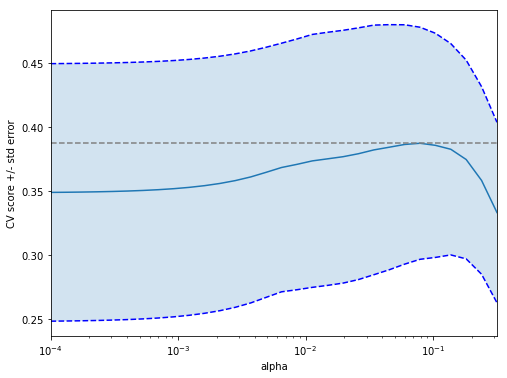

In [40]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [46]:
lasso_cv = linear_model.LassoCV(alphas=alphas,random_state=0)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k ,(train,test) in enumerate (k_fold.split(X_dia,y_dia)):
    lasso_cv.fit(X[train],y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")    

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.03424, score: 0.41103
[fold 1] alpha: 0.31623, score: 0.65708
[fold 2] alpha: 0.18139, score: 0.53623

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


In [41]:
alphas = np.logspace(-4, -0.5, 30)

In [42]:
alphas

array([  1.00000000e-04,   1.32035178e-04,   1.74332882e-04,
         2.30180731e-04,   3.03919538e-04,   4.01280703e-04,
         5.29831691e-04,   6.99564216e-04,   9.23670857e-04,
         1.21957046e-03,   1.61026203e-03,   2.12611233e-03,
         2.80721620e-03,   3.70651291e-03,   4.89390092e-03,
         6.46167079e-03,   8.53167852e-03,   1.12648169e-02,
         1.48735211e-02,   1.96382800e-02,   2.59294380e-02,
         3.42359796e-02,   4.52035366e-02,   5.96845700e-02,
         7.88046282e-02,   1.04049831e-01,   1.37382380e-01,
         1.81393069e-01,   2.39502662e-01,   3.16227766e-01])

In [47]:
lassocv = linear_model.LassoCV()
lassocv.fit(X_dia,y_dia)
lassocv.score(diabetes.data[150:], diabetes.target[150:])

0.48637129852795946

## Unsupervised learning 

In [55]:
#k-mean
from sklearn import cluster,datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_mean = cluster.KMeans(n_clusters=3)
k_mean.fit(X_iris)
#hard to choose, since choose right amount of cluser is hard, and algorithm is sentitive to initializaiton 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
import scipy as sp 
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc 
    face = misc.face(gray= True)
X = face.reshape((-1, 1))    
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

In [80]:
face_compressed

array([[ 113.57006678,  113.57006678,  153.24120581, ...,  113.57006678,
         113.57006678,  153.24120581],
       [  73.91549783,  113.57006678,  113.57006678, ...,  113.57006678,
         153.24120581,  153.24120581],
       [  73.91549783,   73.91549783,  113.57006678, ...,  113.57006678,
         153.24120581,  153.24120581],
       ..., 
       [ 113.57006678,  113.57006678,  113.57006678, ...,  153.24120581,
         153.24120581,  153.24120581],
       [ 113.57006678,  113.57006678,  113.57006678, ...,  153.24120581,
         153.24120581,  153.24120581],
       [ 113.57006678,  113.57006678,  113.57006678, ...,  153.24120581,
         153.24120581,  153.24120581]])

In [75]:
a = np.arange(10).reshape((5, 2))

In [82]:
#Hierachical clustering 
#Agglomerative 
digits = datasets.load_digits()
images = digits.images
images.reshape(-1,1)

array([[  0.],
       [  0.],
       [  5.],
       ..., 
       [ 12.],
       [  1.],
       [  0.]])

In [88]:
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity,n_clusters=32)
agglo.fit(X) 

NameError: name 'grid_to_graph' is not defined

In [87]:
len(images)

1797

## Decompositions

In [95]:
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]
X.shape

(100, 3)

In [91]:
#PCA, select the susccetive components that explain the maximum variance in the signal 
from sklearn import decomposition 
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [92]:
print(pca.explained_variance_)  

[  3.16718300e+00   8.32906459e-01   4.10530791e-32]


In [94]:
pca.n_components = 2
x_reduced = pca.fit_transform(X)
x_reduced.shape

(100, 2)

In [105]:
#ICA, select components so that the distribution of their loading carries a maximum amount of independent informaiton 
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
S= np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)

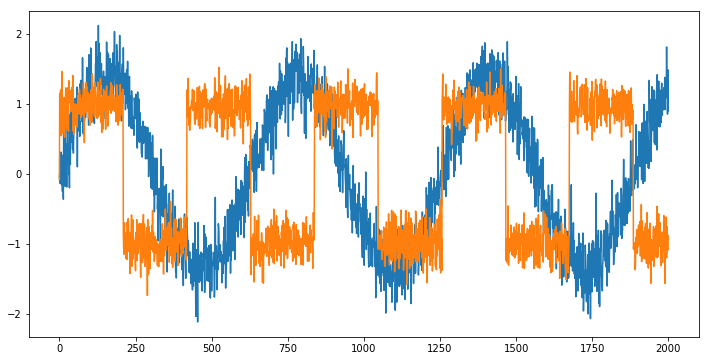

In [106]:
plt.figure().set_size_inches(12, 6)
plt.plot(S)